In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


sao jose da coroa grande br
illoqqortoormiut gl
meulaboh id
butaritari ki
rikitea pf
thompson ca
barentsburg sj
severo-kurilsk ru
cape town za
hobart au
bubaque gw
vaini to
cairns au
hobart au
jamestown sh
port alfred za
attawapiskat ca
ushuaia ar
guanica us
mys shmidta ru
clyde river ca
mamlyutka kz
bluff nz
barrow us
port-cartier ca
ilulissat gl
kondinskoye ru
hilo us
lat yao th
sitka us
sitka us
umm jarr sd
ushuaia ar
ushuaia ar
imeni poliny osipenko ru
ushuaia ar
mataura pf
norman wells ca
felidhoo mv
takoradi gh
busselton au
mataura pf
atar mr
albany au
klyuchi ru
kaeo nz
kahta tr
nikolskoye ru
vanimo pg
illoqqortoormiut gl
ushuaia ar
tasiilaq gl
rikitea pf
lorengau pg
mataura pf
ushuaia ar
kadykchan ru
avarua ck
kavieng pg
oshkosh us
manzanillo mx
ushuaia ar
hobart au
naucalpan mx
iqaluit ca
macaboboni ph
busselton au
illoqqortoormiut gl
palmer us
cabo san lucas mx
ostrovnoy ru
kirovskiy ru
butaritari ki
mumford gh
yellowknife ca
oktyabrskoye ru
punta arenas cl
prince albert ca
k

puerto ayora ec
hobart au
metro id
ostrogozhsk ru
the pas ca
attawapiskat ca
antofagasta cl
bluff nz
libenge cd
chuy uy
khatanga ru
riyadh sa
itaituba br
ilulissat gl
hobart au
rikitea pf
ushuaia ar
mar del plata ar
lebu cl
victor harbor au
karratha au
kawalu id
ushuaia ar
edgewater us
siteki sz
biak id
arraial do cabo br
tiznit ma
meulaboh id
evinayong gq
samalaeulu ws
lobito ao
vestmannaeyjar is
albany au
khatanga ru
bartica gy
nguiu au
hobart au
cap-chat ca
abu samrah qa
punta arenas cl
bozeman us
east london za
buala sb
hermanus za
puerto ayora ec
albany au
yeppoon au
hermanus za
east london za
upernavik gl
ushuaia ar
mataura pf
rikitea pf
goderich sl
banyo cm
chuy uy
puerto ayora ec
bathsheba bb
oktyabrskoye ru
dikson ru
busselton au
hithadhoo mv
kapaa us
barrow us
albany au
bluff nz
cao bang vn
new norfolk au
santa maria py
ushuaia ar
alyangula au
rikitea pf
hermanus za
yulara au
goderich sl
cape town za
amderma ru
rikitea pf
mataura pf
srednekolymsk ru
mayo ca
mahajanga mg
pisco

taolanaro mg
hattiesburg us
graneros cl
barentsburg sj
bengkulu id
belushya guba ru
butaritari ki
albany au
upernavik gl
mataura pf
chapais ca
bredasdorp za
atuona pf
zlotow pl
hilo us
kasongo-lunda cd
taolanaro mg
solnechnyy ru
port elizabeth za
karratha au
yellowknife ca
biltine td
beloha mg
busselton au
bredasdorp za
nyurba ru
albany au
khatanga ru
port alfred za
thompson ca
taolanaro mg
guerrero negro mx
souillac mu
kodiak us
komsomolskiy ru
alofi nu
karamea nz
comodoro rivadavia ar
baruun-urt mn
carnarvon au
amderma ru
grindavik is
namibe ao
igrim ru
mingaora pk
mataura pf
delta del tigre uy
road town vg
hilo us
mataura pf
bethel us
theodoriana gr
illoqqortoormiut gl
gigmoto ph
noumea nc
ancud cl
pevek ru
dikson ru
ushuaia ar
kavaratti in
casablanca ma
kattivakkam in
wawa ca
pevek ru
yellowknife ca
upernavik gl
pato branco br
yellowknife ca
chibuto mz
kemin kg
takoradi gh
martapura id
butaritari ki
rikitea pf
kruisfontein za
clyde river ca
lebu cl
mattru sl
pisco pe
port alfred za

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
# cities

617

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

   # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #print for troubleshooting
        print(f"current city weather object{city_weather}")
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        if(set_count==5):
            break

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao jose da coroa grande
current city weather object{'coord': {'lon': -35.1478, 'lat': -8.8978}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.88, 'feels_like': 75.83, 'temp_min': 74.88, 'temp_max': 74.88, 'pressure': 1015, 'humidity': 80, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 9.13, 'deg': 145, 'gust': 11.81}, 'clouds': {'all': 9}, 'dt': 1631998481, 'sys': {'country': 'BR', 'sunrise': 1631952750, 'sunset': 1631996221}, 'timezone': -10800, 'id': 3388456, 'name': 'São José da Coroa Grande', 'cod': 200}
Processing Record 2 of Set 1 | illoqqortoormiut
current city weather object{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 3 of Set 1 | meulaboh
current city weather object{'coord': {'lon': 96.1285, 'lat': 4.1363}, 'weather': [{'id': 804, '

current city weather object{'coord': {'lon': -66.908, 'lat': 17.9716}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.35, 'feels_like': 90.19, 'temp_min': 80.02, 'temp_max': 87.21, 'pressure': 1012, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 346, 'gust': 4}, 'clouds': {'all': 55}, 'dt': 1631998484, 'sys': {'type': 2, 'id': 2040053, 'country': 'PR', 'sunrise': 1631960162, 'sunset': 1632004049}, 'timezone': -14400, 'id': 4565090, 'name': 'Guánica', 'cod': 200}
Processing Record 19 of Set 1 | mys shmidta
current city weather object{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 20 of Set 1 | clyde river
current city weather object{'coord': {'lon': -68.5914, 'lat': 70.4692}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.23, 'feels_like': 24.42, 'temp_min'

current city weather object{'coord': {'lon': -126.8329, 'lat': 65.282}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.04, 'feels_like': 47.84, 'temp_min': 50.04, 'temp_max': 50.04, 'pressure': 1001, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1631998489, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1631973542, 'sunset': 1632019426}, 'timezone': -21600, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
Processing Record 34 of Set 1 | felidhoo
current city weather object{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 35 of Set 1 | takoradi
current city weather object{'coord': {'lon': -1.7554, 'lat': 4.8845}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.22, 'feels_like': 76.68, 'temp_min': 75.22, 'temp_max

current city weather object{'coord': {'lon': 150.7967, 'lat': -2.5744}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.17, 'feels_like': 90.81, 'temp_min': 83.17, 'temp_max': 83.17, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 13.22, 'deg': 76, 'gust': 16.02}, 'rain': {'1h': 0.6}, 'clouds': {'all': 38}, 'dt': 1631998492, 'sys': {'country': 'PG', 'sunrise': 1631994465, 'sunset': 1632038031}, 'timezone': 36000, 'id': 2094342, 'name': 'Kavieng', 'cod': 200}
Processing Record 49 of Set 1 | oshkosh
current city weather object{'coord': {'lon': -88.5426, 'lat': 44.0247}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.8, 'feels_like': 71.02, 'temp_min': 67.82, 'temp_max': 77.18, 'pressure': 1021, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 80, 'gu

current city weather object{'coord': {'lon': -105.7677, 'lat': 53.2001}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.55, 'feels_like': 79.25, 'temp_min': 80.55, 'temp_max': 80.55, 'pressure': 994, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1631998496, 'sys': {'type': 1, 'id': 875, 'country': 'CA', 'sunrise': 1631968958, 'sunset': 1632013902}, 'timezone': -21600, 'id': 6113335, 'name': 'Prince Albert', 'cod': 200}
Processing Record 13 of Set 2 | dikson
current city weather object{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 34.29, 'feels_like': 21.69, 'temp_min': 34.29, 'temp_max': 34.29, 'pressure': 1018, 'humidity': 76, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 26.26, 'deg': 54, 'g

current city weather object{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.27, 'feels_like': 60.24, 'temp_min': 61.27, 'temp_max': 61.27, 'pressure': 1021, 'humidity': 67, 'sea_level': 1021, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 21.74, 'deg': 46, 'gust': 31.74}, 'clouds': {'all': 0}, 'dt': 1631998499, 'sys': {'country': 'ZA', 'sunrise': 1631937801, 'sunset': 1631980908}, 'timezone': 7200, 'id': 1006984, 'name': 'East London', 'cod': 200}
Processing Record 27 of Set 2 | burica
current city weather object{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 28 of Set 2 | victoria
current city weather object{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.42, 'feels_like': 97.02, 'tem

current city weather object{'coord': {'lon': 123.3711, 'lat': 66.7697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.03, 'feels_like': 23.29, 'temp_min': 33.03, 'temp_max': 33.03, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 13.96, 'deg': 329, 'gust': 19.35}, 'clouds': {'all': 100}, 'dt': 1631998504, 'sys': {'country': 'RU', 'sunrise': 1631999861, 'sunset': 1632045796}, 'timezone': 32400, 'id': 2012530, 'name': 'Zhigansk', 'cod': 200}
Processing Record 41 of Set 2 | waipawa
current city weather object{'coord': {'lon': 175.5153, 'lat': -41.4122}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 45.36, 'feels_like': 41.59, 'temp_min': 45.23, 'temp_max': 48.04, 'pressure': 1020, 'humidity': 66, 'sea_level': 1020, 'grnd_level': 989}, 'visibility': 10000, 'wind':

current city weather object{'coord': {'lon': 109.9776, 'lat': 39.8161}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 59.49, 'feels_like': 58.48, 'temp_min': 59.49, 'temp_max': 59.49, 'pressure': 1014, 'humidity': 71, 'sea_level': 1014, 'grnd_level': 857}, 'visibility': 10000, 'wind': {'speed': 6.64, 'deg': 215, 'gust': 10.49}, 'rain': {'1h': 0.42}, 'clouds': {'all': 100}, 'dt': 1631998508, 'sys': {'country': 'CN', 'sunrise': 1632003878, 'sunset': 1632048206}, 'timezone': 28800, 'id': 1812256, 'name': 'Dongsheng', 'cod': 200}
Processing Record 6 of Set 3 | arraial do cabo
current city weather object{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.26, 'feels_like': 74.17, 'temp_min': 73.26, 'temp_max': 78.76, 'pressure': 1013, 'humidity': 83}, 'visibility': 8000, 'wind': {'speed': 1

current city weather object{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.65, 'feels_like': 62.24, 'temp_min': 62.65, 'temp_max': 63.01, 'pressure': 1014, 'humidity': 77}, 'visibility': 7000, 'wind': {'speed': 6.91, 'deg': 330}, 'clouds': {'all': 90}, 'dt': 1631998512, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1631962634, 'sunset': 1632006044}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
Processing Record 21 of Set 3 | wajima
current city weather object{'coord': {'lon': 136.9, 'lat': 37.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.01, 'feels_like': 72.34, 'temp_min': 72.01, 'temp_max': 72.01, 'pressure': 1014, 'humidity': 73, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 17.96, 'deg': 48, 'gust': 22.15

current city weather object{'coord': {'lon': -27.0667, 'lat': 38.7333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.25, 'feels_like': 68.4, 'temp_min': 68.25, 'temp_max': 68.76, 'pressure': 1026, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 7.96, 'deg': 61, 'gust': 8.21}, 'clouds': {'all': 40}, 'dt': 1631998516, 'sys': {'type': 1, 'id': 6895, 'country': 'PT', 'sunrise': 1631950351, 'sunset': 1631994742}, 'timezone': 0, 'id': 3372760, 'name': 'Praia da Vitória', 'cod': 200}
Processing Record 35 of Set 3 | katsina
current city weather object{'coord': {'lon': 7.6006, 'lat': 12.9894}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.67, 'feels_like': 84.6, 'temp_min': 82.67, 'temp_max': 82.67, 'pressure': 1011, 'humidity': 56, 'sea_level': 1011, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 10.4, 

current city weather object{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.11, 'feels_like': 81.84, 'temp_min': 80.11, 'temp_max': 81.48, 'pressure': 1019, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 327, 'gust': 11.99}, 'clouds': {'all': 96}, 'dt': 1631998519, 'sys': {'type': 2, 'id': 2001562, 'country': 'US', 'sunrise': 1631982306, 'sunset': 1632026252}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}
Processing Record 1 of Set 4 | bang mun nak
current city weather object{'coord': {'lon': 100.3792, 'lat': 16.0278}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.5, 'feels_like': 79.14, 'temp_min': 77.5, 'temp_max': 77.5, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 0.81, '

current city weather object{'coord': {'lon': -46.02, 'lat': -1.195}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.39, 'feels_like': 79.39, 'temp_min': 79.39, 'temp_max': 79.39, 'pressure': 1010, 'humidity': 76, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 9.24, 'deg': 69, 'gust': 17.18}, 'clouds': {'all': 51}, 'dt': 1631998524, 'sys': {'country': 'BR', 'sunrise': 1631955303, 'sunset': 1631998885}, 'timezone': -10800, 'id': 3402648, 'name': 'Carutapera', 'cod': 200}
Processing Record 16 of Set 4 | souillac
current city weather object{'coord': {'lon': 57.5167, 'lat': -20.5167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.58, 'feels_like': 67.06, 'temp_min': 66.58, 'temp_max': 70.36, 'pressure': 1015, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 330}, 'clouds': 

current city weather object{'coord': {'lon': 36.9333, 'lat': -4.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.42, 'feels_like': 61.79, 'temp_min': 62.42, 'temp_max': 62.42, 'pressure': 1017, 'humidity': 73, 'sea_level': 1017, 'grnd_level': 862}, 'visibility': 10000, 'wind': {'speed': 13.33, 'deg': 142, 'gust': 28.9}, 'clouds': {'all': 84}, 'dt': 1631998527, 'sys': {'country': 'TZ', 'sunrise': 1631935423, 'sunset': 1631978958}, 'timezone': 10800, 'id': 152042, 'name': 'Naberera', 'cod': 200}
Processing Record 30 of Set 4 | nizhneyansk
current city weather object{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 31 of Set 4 | houston
current city weather object{'coord': {'lon': -95.3633, 'lat': 29.7633}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.46, 'feels_like': 98.76, 'temp_min

current city weather object{'coord': {'lon': 172.9752, 'lat': 1.3292}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 92.28, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1631998530, 'sys': {'type': 1, 'id': 7300, 'country': 'KI', 'sunrise': 1631989118, 'sunset': 1632032735}, 'timezone': 43200, 'id': 7601762, 'name': 'Bairiki Village', 'cod': 200}
Processing Record 44 of Set 4 | shingu
current city weather object{'coord': {'lon': 135.9833, 'lat': 33.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.9, 'feels_like': 77.18, 'temp_min': 75.9, 'temp_max': 75.9, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.24, 'deg': 315, 'gust': 8.01}

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head


<bound method NDFrame.head of                          City      Lat       Lng  Max Temp  Humidity  \
0    Sao Jose Da Coroa Grande  -8.8978  -35.1478     74.88        80   
1                    Meulaboh   4.1363   96.1285     73.92        98   
2                  Butaritari   3.0707  172.7902     82.78        69   
3                     Rikitea -23.1203 -134.9692     72.37        78   
4                    Thompson  55.7435  -97.8558     59.16        55   
..                        ...      ...       ...       ...       ...   
175                    Harper   4.3750   -7.7169     77.61        86   
176             Makakilo City  21.3469 -158.0858     80.62        65   
177               Port-Gentil  -0.7193    8.7815     76.96        88   
178            Saint-Philippe -21.3585   55.7679     67.59        87   
179               Saint Marys  30.7305  -81.5465     86.25        78   

     Cloudiness  Wind Speed Country                 Date  
0             9        9.13      BR  2021-09-1

In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Jose Da Coroa Grande,BR,2021-09-18 20:54:41,-8.8978,-35.1478,74.88,80,9,9.13
1,Meulaboh,ID,2021-09-18 20:54:42,4.1363,96.1285,73.92,98,100,5.14
2,Butaritari,KI,2021-09-18 20:54:42,3.0707,172.7902,82.78,69,17,17.45
3,Rikitea,PF,2021-09-18 20:54:42,-23.1203,-134.9692,72.37,78,30,12.01
4,Thompson,CA,2021-09-18 20:54:43,55.7435,-97.8558,59.16,55,90,6.91
...,...,...,...,...,...,...,...,...,...
175,Harper,LR,2021-09-18 20:55:30,4.3750,-7.7169,77.61,86,93,7.34
176,Makakilo City,US,2021-09-18 20:55:31,21.3469,-158.0858,80.62,65,90,9.22
177,Port-Gentil,GA,2021-09-18 20:55:31,-0.7193,8.7815,76.96,88,90,13.80
178,Saint-Philippe,RE,2021-09-18 20:55:31,-21.3585,55.7679,67.59,87,78,12.21


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631998532.374103

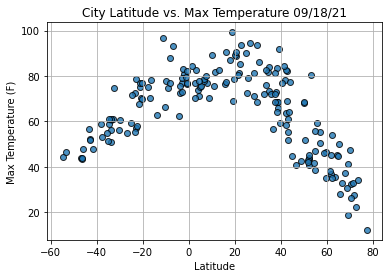

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

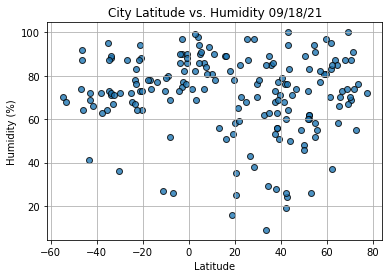

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

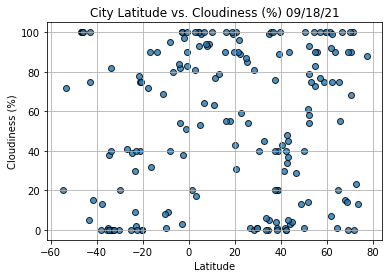

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

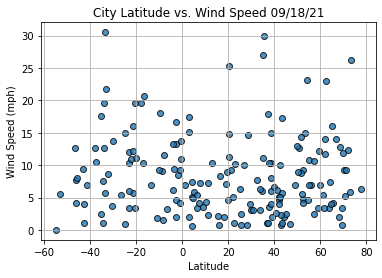

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-09-18 20:54:11
Lat                         -54.8
Lng                         -68.3
Max Temp                    44.26
Humidity                       70
Cloudiness                     20
Wind Speed                    0.0
Name: 13, dtype: object

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

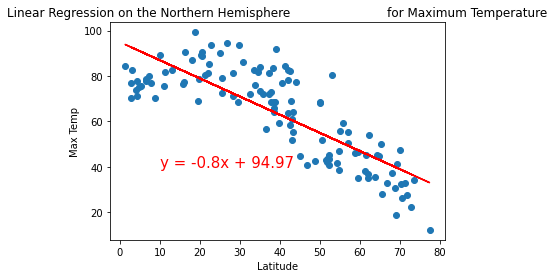

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

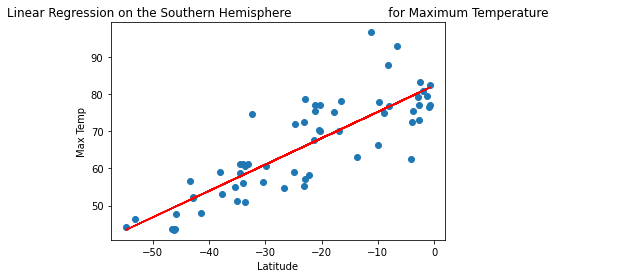

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

                       


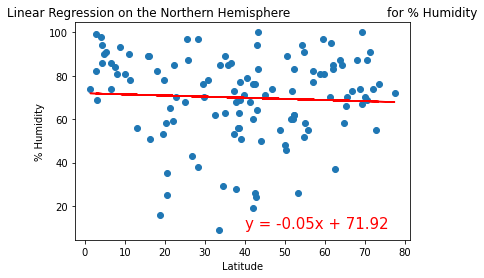

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


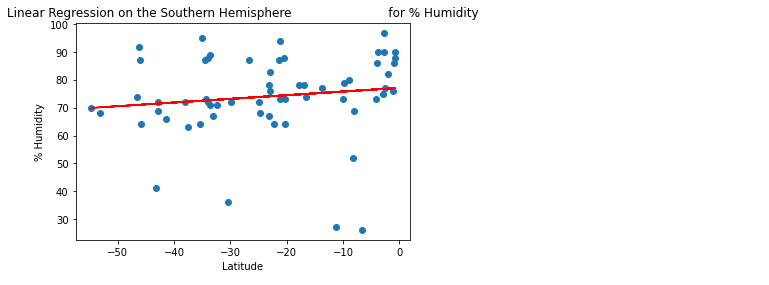

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

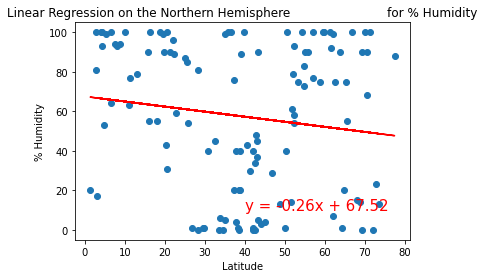

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

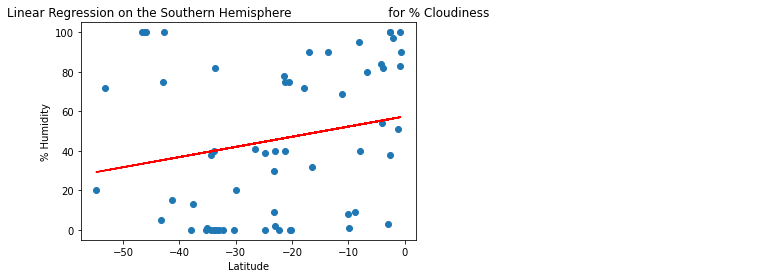

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Humidity',(40,10))


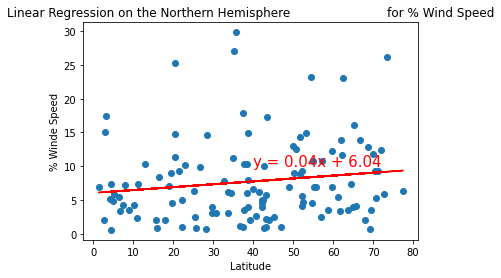

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Wind Speed', '% Winde Speed',(40,10))

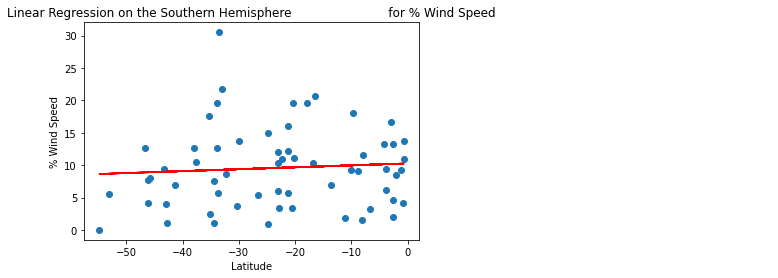

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(40,10))